In [3]:
# go to the root directory
# %cd /home/studio-lab-user/701-simplicity-bias
# %cd D:/repos/701-simplicity-bias/
# %cd /home/studio-lab-user/701-simplicity-bias
%cd ~/source/701-simplicity-bias
import os

assert os.path.exists('./trainers/trainer.py')

/Users/tianwen/source/701-simplicity-bias


In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
from synthetic_data.linear_slabs import LinearSlabDataset

### $MS-(5,7), \hat{MS}-(5,7)$

In [7]:
data_config = dict(
    num_samples=110000,
    num_dim=50,
    margins=0.1,
    width=1.0,
    random_orthonormal_transform=True
)

ms_57_data_config = {**data_config, **{'slabs': np.array([5] + [7] * 49), 'noise_proportions': 0,
                                       'slab_probabilities': [[0.125, 0.5, 0.75, 0.5, 0.125]] +
                                                         [[1/16.0, 0.25, 7 / 16.0, 0.5, 7 / 16.0, 0.25, 1 / 16.0]] * 49}}

ms_57_noisy_data_config = {**data_config, **{'slabs': np.array([5] + [7] * 49), 'noise_proportions': np.array([0.1] + [0] * 49),
                                       'slab_probabilities': [[0.125, 0.5, 0.75, 0.5, 0.125]] +
                                                         [[1/16.0, 0.25, 7 / 16.0, 0.5, 7 / 16.0, 0.25, 1 / 16.0]] * 49}}

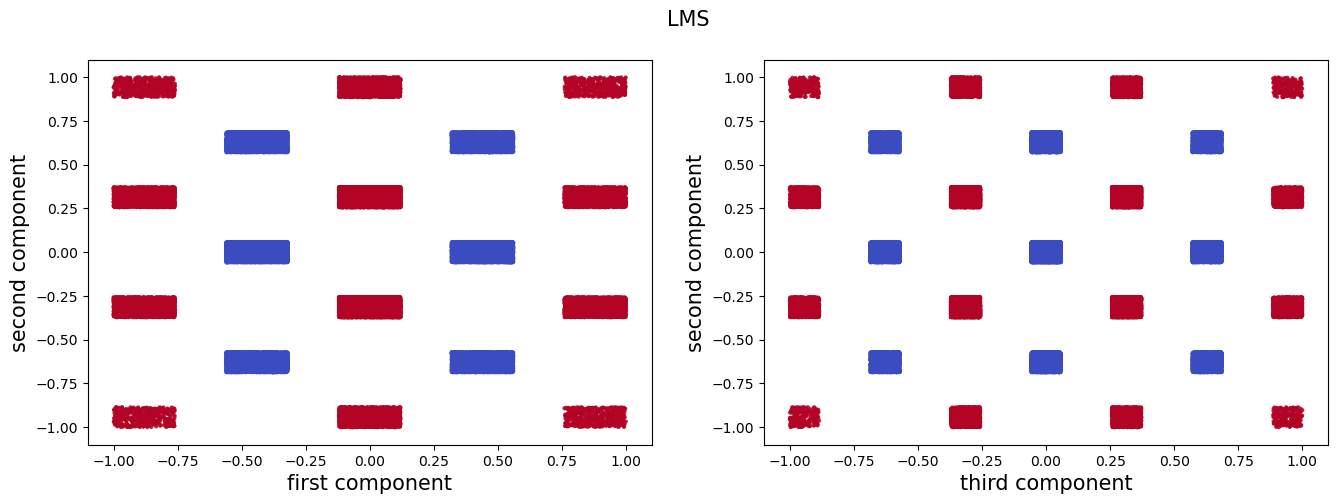

In [8]:
ms_57_data = LinearSlabDataset.generate(**ms_57_data_config)
ms_57_data.visualize()

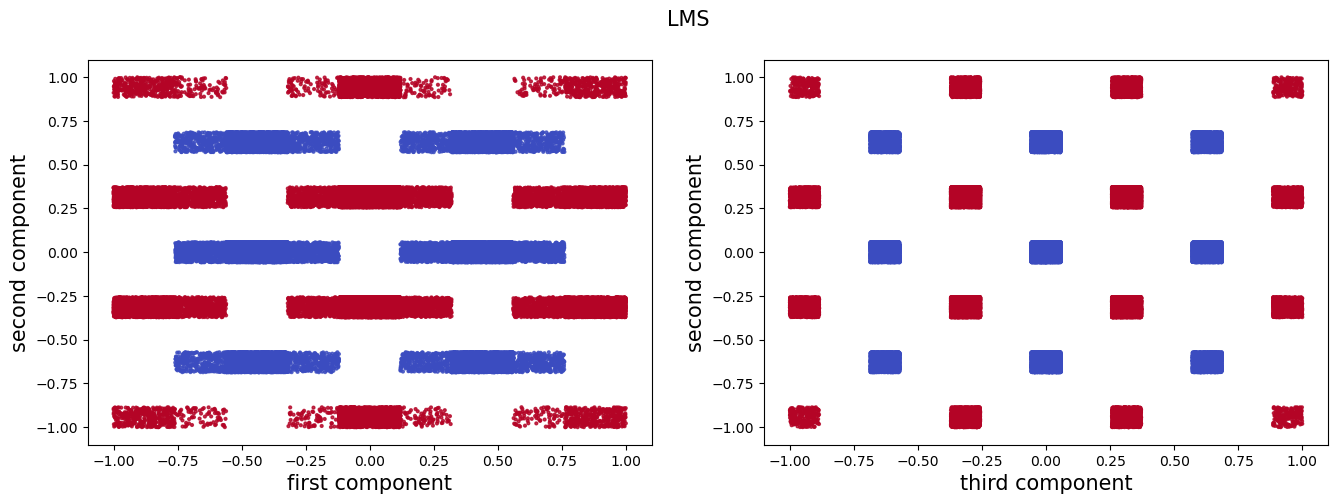

In [9]:
ms_57_noisy_data = LinearSlabDataset.generate(**ms_57_noisy_data_config)
ms_57_noisy_data.visualize()

In [100]:
#@title train/val split and save linear data
os.makedirs('./data', exist_ok=True)
data_dir = os.path.abspath('./data')
print('Saving Data to {}'.format(data_dir))
train_size = 100000
for name, data, train_size in [
    # ('lms_5', lms_5_data, 100000),
    # ('ms_57', ms_57_data, 100000),
    # ('lms_7_noisy', lms_7_noisy_data, 100000),
    # ('lms_7_40000_noisy', lms_7_40000_noisy_data, 40000),
    # ('lms_7_40000_uniform_noisy', lms_7_40000_uniform_noisy_data, 40000),
    ('ms57', ms_57_data, 100000),
    ('ms57_noisy', ms_57_noisy_data, 100000),
]:
    path = os.path.join(data_dir, name)
    data.save_as(path, train_size)

Saving Data to /home/studio-lab-user/701-simplicity-bias/data


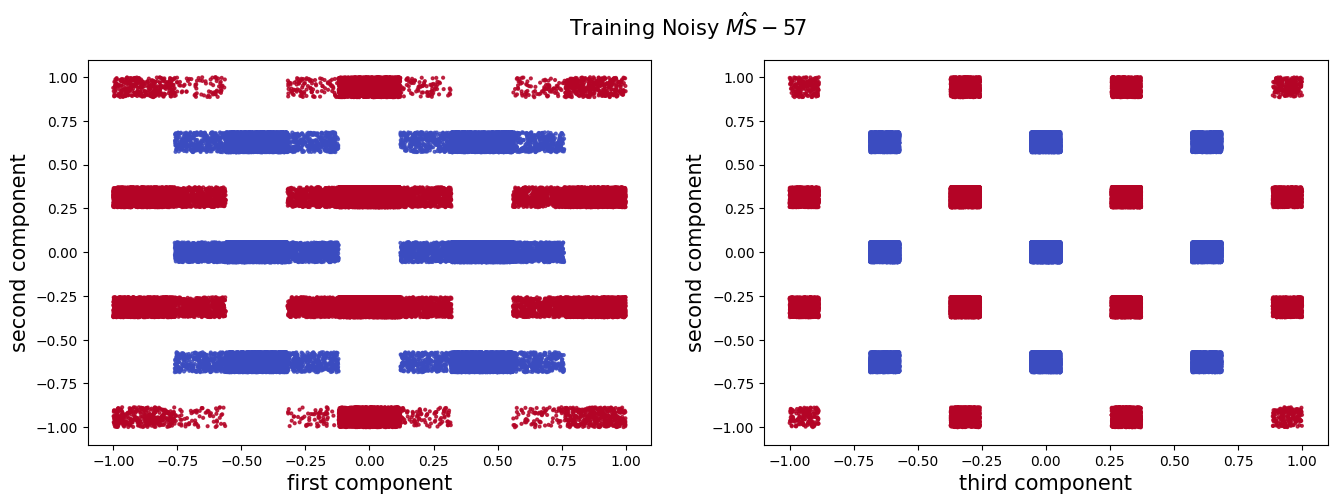

In [103]:
#@title test loading data
loaded_ms57_train= LinearSlabDataset.from_file(os.path.join(data_dir, 'ms57_noisy_train.npz'))
loaded_ms57_train.visualize( title=r'Training Noisy $\hat{MS}-57$')

### $\hat{MS}-(3,5)$

In [112]:
data_config = dict(
    num_samples=110000,
    num_dim=50,
    margin=0.1,
    width=1.0,
    random_orthonormal_transform=True
)

ms_35_data_config = {**data_config, **{'slabs': np.array([3] + [5] * 49), 'noise_proportions': 0,
                                       'slab_probabilities': [[0.5, 1, 0.5]] +
                                                         [[0.125, 0.5, 0.75, 0.5, 0.125]] * 49}}

ms_35_noisy_data_config = {**data_config, **{'slabs': np.array([3] + [5] * 49), 'noise_proportions': np.array([0.1] + [0] * 49),
                                       'slab_probabilities': [[0.5, 1, 0.5]] +
                                                         [[0.125, 0.5, 0.75, 0.5, 0.125]] * 49}}

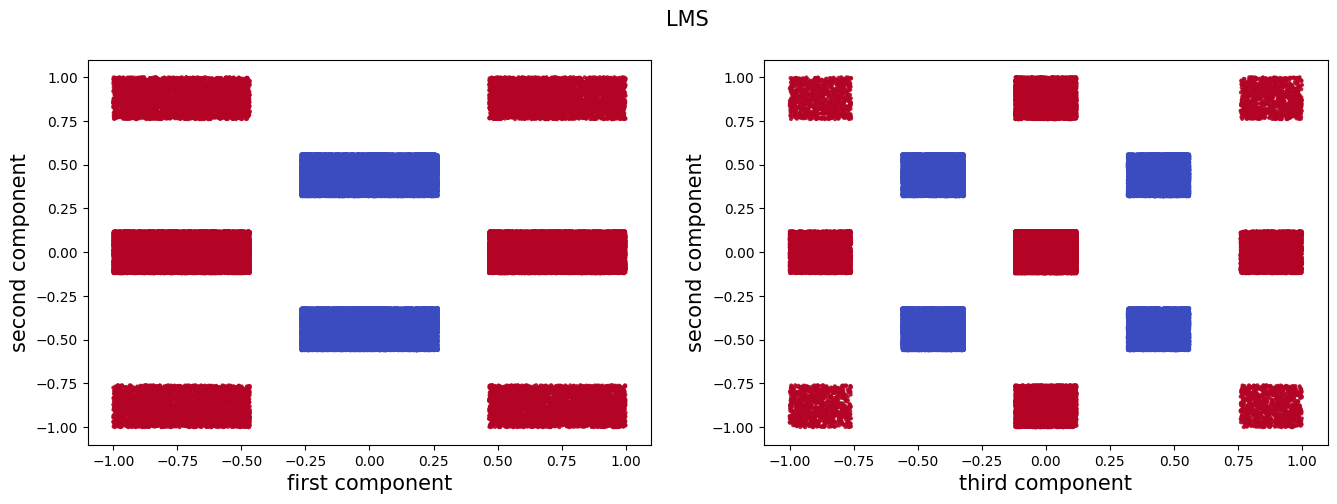

In [113]:
ms_35_data = LinearSlabDataset.generate(**ms_35_data_config)
ms_35_data.visualize()

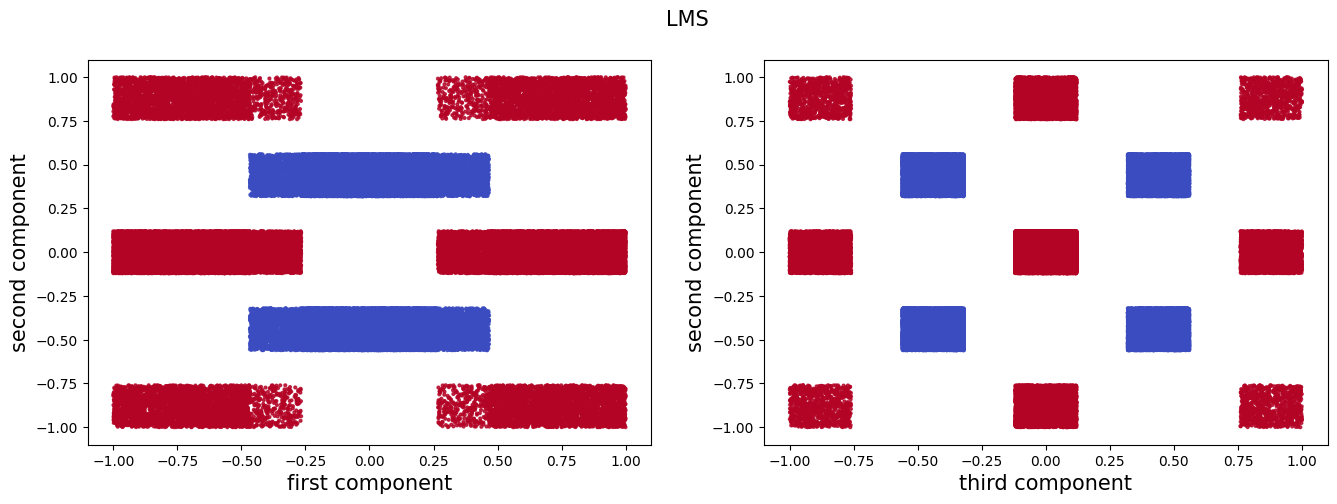

In [114]:
ms_35_noisy_data = LinearSlabDataset.generate(**ms_35_noisy_data_config)
ms_35_noisy_data.visualize()

In [115]:
#@title train/val split and save linear data
os.makedirs('./data', exist_ok=True)
data_dir = os.path.abspath('./data')
print('Saving Data to {}'.format(data_dir))
train_size = 100000
for name, data, train_size in [
    ('ms35', ms_35_data, 100000),
    ('ms35_noisy', ms_35_noisy_data, 100000),
]:
    path = os.path.join(data_dir, name)
    data.save_as(path, train_size)

Saving Data to /home/studio-lab-user/701-simplicity-bias/data


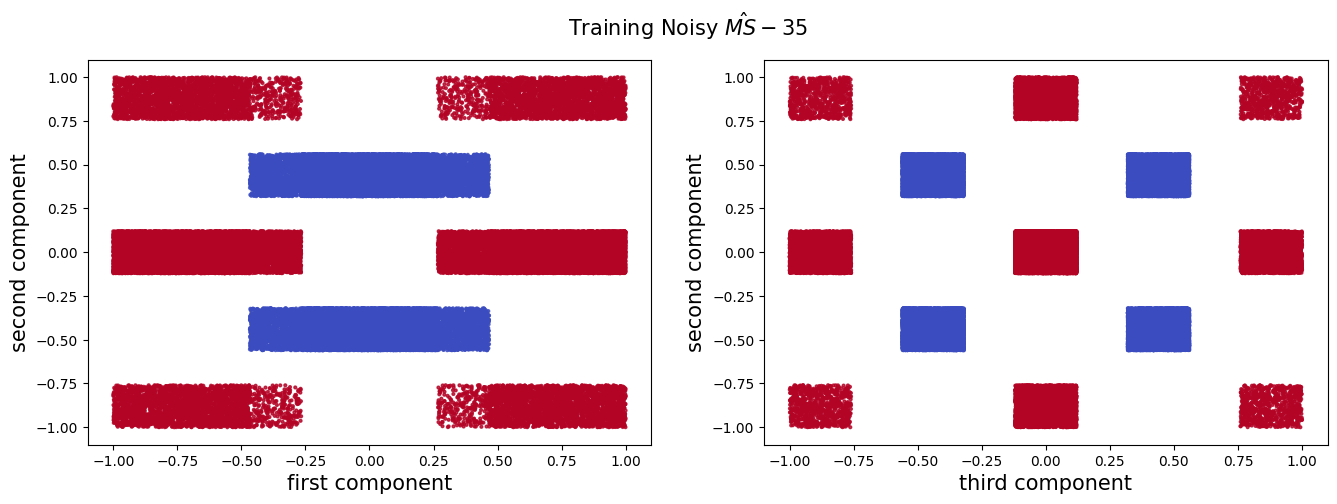

In [116]:
#@title test loading data
loaded_ms57_train= LinearSlabDataset.from_file(os.path.join(data_dir, 'ms35_noisy_train.npz'))
loaded_ms57_train.visualize( title=r'Training Noisy $\hat{MS}-35$')